V analýze používame nasledujúce knižnice:

In [160]:
import seaborn as sea
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

from pandas.api.types import is_numeric_dtype

Datasety (vo formáte csv) načítame do dataframov:

In [161]:
pre_data = pd.read_csv("meranie_2021_pre.csv")
post_data = pd.read_csv("meranie_2021_post.csv")

# Základné údaje o datasetoch

In [162]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Columns: 112 entries, Timestamp to Súhlasím so spracovaním osobných údajov
dtypes: float64(3), int64(37), object(72)
memory usage: 339.6+ KB


In [163]:
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 130 entries, Timestamp to Ako hodnotíte nasledujúce metódy? [Metóda otázok a odpovedí]
dtypes: int64(47), object(83)
memory usage: 151.5+ KB


In [164]:
pre_data = pre_data.rename(columns=lambda x: x.strip())
post_data = post_data.rename(columns=lambda x: x.strip())

In [165]:
for col in pre_data.columns:
    print(col)

Timestamp
Email
Meno a priezvisko
Telefónne číslo
Pohlavie
Názov školy a adresa školy
Absolvované vzdelanie:
Koľko rokov učíte INF?
Aké máte predchádzajúce skúsenosti s micro:bitmi?
Ktoré programy/platformy využívate na hodinách?
Zapojili ste sa v minulosti (aj so žiakmi) do nejakých INF projektov/súťaží? Ak áno, vymenujte.
Aké mimoškolské krúžky a aktivity sú k dispozícii deťom na 2. stupni vo Vašej škole?
S akými organizáciami už spolupracujete v rámci aktivít neformálneho vzdelávania?
Aký podiel detí zo sociálne znevýhodneného prostredia navštevuje Vašu školu?
Aké prostredia ste s BBC micro:bit využívali?
Aký ďalší hardvér (príslušenstvo) pre micro:bit ste použili?
Aké materiály ste použili pri príprave na vyučovanie alebo priamo na vyučovaní?
Myslíte si, že BBC micro:bit Vám pomohol byť viac sebaistým/sebaistou vo výučbe informatiky?
Myslíte si, že výučba s BBC micro:bit spravila Vaše hodiny zaujímavejšími?
Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit?
Čo st

In [166]:
for col in post_data.columns:
    print(col)

Timestamp
Email
Číslo žiadosti
Meno a priezvisko
Telefónne číslo
Pohlavie
Názov školy a adresa školy
Zmenil sa počas školského roka zodpovedný riešiteľ projektu? (napr. kolega odišiel a Vy ste prevzali jeho projekt)
Absolvované vzdelanie:
Koľko rokov učíte INF?
Aké máte skúsenosti s micro:bitmi?
Ktoré programy/platformy využívate na hodinách?
Zapojili ste sa tento školský rok (aj so žiakmi) do nejakých INF projektov/súťaží? Ak áno, vymenujte.
S akými organizáciami už spolupracujete v rámci aktivít neformálneho vzdelávania?
Všimli ste si záujem kolegov (učiteľov iných predmetov) ohľadom micro:bit aktivít?
Aký podiel detí zo sociálne znevýhodneného prostredia navštevuje Vašu školu?
Aké prostredia ste s BBC micro:bit využívali?
Aký HW pre micro:bit ste použili?
Aké materiály ste použili pri príprave na vyučovanie alebo priamo na vyučovaní?
Myslíte si, že BBC micro:bit Vám pomohol byť viac sebaistým/sebaistou vo výučbe informatiky?
Myslíte si, že výučba s BBC micro:bit spravila Vaše hodiny

Datasety boli získané v rámci merania vykonávaného na učiteľoch a učiteľkách ZŠ a SŠ, ktorí boli zapojení do projektu [ENTER](https://enter.study/) (prvé kolo). V rámci tohto projektu pracovali s [micro:bitmi](https://www.ucimeshardverom.sk/materialy/zacni/) na hodinách informatiky. Dataset "pre_data" bol zozbieraný v období od Odkóbra po December 2020. Dataset "post_data" bol zozbieraný v období od Jún 2021 po Decembre 2022 (podľa toho, kedy učitelia končili projekt).

**Riadky**  
- Dataset `pre_data` obsahuje 390 riadkov, `post_data` obsahuje 150 riadkov.

**Stĺpce**
- Dataset `pre_data` obsahuje 112 stĺpcov, `post_data` obsahuje 130 stĺpcov.
- Oba datasety obsahujú osobné údaje (email, meno a priezvisko, tel. číslo). Tieto údaje nám vedia pomôcť pri párovaní záznamov z pre a post dotazníkov, avšak je potrebné zabezpečiť ich ochranu v súlade s GDPR.

# Párovanie záznamov

## Deduplikácia

- V POST dotazníku neboli žiadne duplikáty (na základe mailovej adresy).
- V PRE dotazníku bolo 12 duplikátov (na základe mailovej adresy) ktoré sme manuálne v CSV súbore odstránili.
- Okrem toho sme vymazali aj testovacie záznamy (od nadácie Pontis napr.)


In [167]:
pre_data['Email'] = pre_data['Email'].str.strip()

In [168]:
pre_data[pre_data['Email'].duplicated()]

,Timestamp,Email,Meno a priezvisko,Telefónne číslo,Pohlavie,Názov školy a adresa školy,Absolvované vzdelanie:,Koľko rokov učíte INF?,Aké máte predchádzajúce skúsenosti s micro:bitmi?,Ktoré programy/platformy využívate na hodinách?,...,Ako hodnotíte nasledujúce metódy? [Diskusia],Ako hodnotíte nasledujúce metódy? [Práca v skupine],Ako hodnotíte nasledujúce metódy? [Kooperatívne vyučovanie],Ako hodnotíte nasledujúce metódy? [Učenie sa pomocou objavovania],Ako hodnotíte nasledujúce metódy? [Samostatná práca],Ako hodnotíte nasledujúce metódy? [Storytelling/Rozprávanie príbehov],Ako hodnotíte nasledujúce metódy? [Rovesnícke učenie],Ako hodnotíte nasledujúce metódy? [Dramatická výchova (hra)],Ako hodnotíte nasledujúce metódy? [Metóda otázok a odpovedí],Súhlasím so spracovaním osobných údajov


In [169]:
post_data['Email'] = post_data['Email'].str.strip()

In [170]:
post_data[post_data['Email'].duplicated()]

,Timestamp,Email,Číslo žiadosti,Meno a priezvisko,Telefónne číslo,Pohlavie,Názov školy a adresa školy,Zmenil sa počas školského roka zodpovedný riešiteľ projektu? (napr. kolega odišiel a Vy ste prevzali jeho projekt),Absolvované vzdelanie:,Koľko rokov učíte INF?,...,Ako hodnotíte nasledujúce metódy? [Tvorba projektov],Ako hodnotíte nasledujúce metódy? [Diskusia],Ako hodnotíte nasledujúce metódy? [Práca v skupine],Ako hodnotíte nasledujúce metódy? [Kooperatívne vyučovanie],Ako hodnotíte nasledujúce metódy? [Učenie sa pomocou objavovania],Ako hodnotíte nasledujúce metódy? [Samostatná práca],Ako hodnotíte nasledujúce metódy? [Storytelling/Rozprávanie príbehov],Ako hodnotíte nasledujúce metódy? [Rovesnícke učenie],Ako hodnotíte nasledujúce metódy? [Dramatická výchova (hra)],Ako hodnotíte nasledujúce metódy? [Metóda otázok a odpovedí]


## Párovanie

In [171]:
pre_data.columns = pre_data.columns.str.strip()
post_data.columns = post_data.columns.str.strip()

In [172]:
# Pomocnú cyklus na prezistenie, ktoré záznamy nie je možné spárovať
# (slúži pri manuálnom opravovaní mailových adries aby bolo možné záznamy spárovať)

matched_emails = []
matched_ids = []
not_matched_emails = []

for index, post_data_row in post_data.iterrows():
    pre_data_row = pre_data.loc[pre_data['Email'] == post_data_row['Email']]
    if len(pre_data_row):
        matched_emails.append(pre_data_row['Email'].item())
        matched_ids.append({"pre": pre_data_row.index.values[0], "post": index})
    else:
        not_matched_emails.append(post_data_row['Email'])
#         print(f"Unmatched: {post_data_row['Email']} | " \
#               f"{post_data_row['Meno a priezvisko']} | {post_data_row['Názov školy a adresa školy']}")

print(f"Matched {len(matched_emails)} emails")
print(f"Did not match {len(not_matched_emails)} emails")

Matched 140 emails
Did not match 9 emails


## Tvorba novej tabuľky s len spárovanými údajmi

In [173]:
# Premenovanie stĺpcov
pre_data = pre_data.add_prefix("PRE ")
post_data = post_data.add_prefix("POST ")

In [174]:
merged_data = pre_data.copy()
merged_data = merged_data.merge(post_data, left_on="PRE Email", right_on="POST Email", how="inner")

In [175]:
merged_data.to_csv("meranie_2021_merged.csv")

## Transformácia textových likertových škál na číselné

In [176]:
def to_number_ako_casto(val):
    if val == "nikdy":
        return 1
    elif val == "zriedka":
        return 2
    elif val == "občas":
        return 3
    elif val == "veľmi často":
        return 4
    elif val == "neustále":
        return 5
    else:
        raise Exception(f"No such {val}")

def to_number_ako_dobre(val):
    if val == "nie som v tom dobrý/á":
        return 1
    elif val == "som v tom priemerne dobrý/á":
        return 2
    elif val == "som v tom dobrý/á":
        return 3
    else:
        raise Exception(f"No such {val}")

def to_number_ako_hodnotite(val):
    if val == "neefektívne":
        return 1
    elif val == "skôr neefektívne":
        return 2
    elif val == "skôr efektívne":
        return 3
    elif val == "efektívne":
        return 4
    else:
        raise Exception(f"No such {val}")

In [177]:
for column_name in merged_data.columns:
    text_to_number_function = None
    if "Ako dobre" in column_name:
        text_to_number_function = to_number_ako_dobre
    elif "Ako často" in column_name:
        text_to_number_function = to_number_ako_casto
    elif "Ako hodnotíte" in column_name:
        text_to_number_function = to_number_ako_hodnotite
    
    if text_to_number_function is not None:
        merged_data[column_name] = merged_data[column_name].apply(lambda x: text_to_number_function(x))

## Vypočítaj diff stĺpce

In [181]:
for column_name in merged_data.columns:
    if column_name.startswith("POST "):
        bare_column_name = column_name[5:]
        pre_column_name = f"PRE {bare_column_name}"
        if pre_column_name in merged_data.columns:
            if is_numeric_dtype(merged_data[pre_column_name].dtype):
                diff_column_name = f"DIFF {bare_column_name}"
                merged_data[diff_column_name] = merged_data[column_name] - merged_data[pre_column_name]


In [182]:
merged_data.to_csv("meranie_2021_merged.csv")

## Pairplot

In [183]:
# Žiadna korelácia sa nenašla

# sea.pairplot(
#     merged_data,
#     x_vars=[
#         'POST Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit? Prosím, napíšte LEN číslo.',
#         'PRE Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit?',
#     ],
#     y_vars=merged_data.filter(regex=("DIFF *")).columns,
# )

## Hľadanie výraznejších zmien

Najprv vyskúšame pozrieť priemer všetkých DIFF atribútov.

In [184]:
for col_name in merged_data.filter(regex=("DIFF *")).columns:
    col_mean = merged_data[col_name].mean()
    if abs(col_mean) >= 0.2:
        print(col_mean, col_name)

0.9714285714285714 DIFF Koľko rokov učíte INF?
-0.30714285714285716 DIFF Čo ste schopný(á) urobiť, aby ste naučil(a) žiakov kriticky myslieť?
-0.2357142857142857 DIFF Čo ste schopný(á) urobiť, aby ste používali pestré možnosti preverovania vedomostí a zručností?
-0.2 DIFF Čo ste schopný(á) urobiť, aby ste podporovali rozvoj talentovaných žiakov?
0.3 DIFF Ako často využívate na INF nasledujúce stratégie na programovanie? [Programovanie vo dvojici (Párové programovanie)]


Keďže priemer všetkých DIFF atribútov nevykázal výraznejšie zmeny (okrem "Koľko rokov učíte INF", kde je medián zmeny približne 1 rok) skúsime odstrániť záznamy, kde učitelia majú DIFF v počte rokov vyš.

In [185]:
diff_years = merged_data['DIFF Koľko rokov učíte INF?'].tolist()

In [186]:
cleaned_merged_data = merged_data[merged_data['DIFF Koľko rokov učíte INF?'].isin([-2, -1, 0, 1, 2])]

for col_name in cleaned_merged_data.filter(regex=("DIFF *")).columns:
    col_mean = cleaned_merged_data[col_name].mean()
    if abs(col_mean) >= 0.18:
        print(col_mean, col_name)

0.45 DIFF Koľko rokov učíte INF?
-0.21 DIFF Čo ste schopný(á) urobiť s veľmi problémovými žiakmi?
-0.27 DIFF Čo ste schopný(á) urobiť, aby ste naučil(a) žiakov kriticky myslieť?
-0.19 DIFF Čo ste schopný(á) urobiť, aby žiaci pochopili, aké správanie od nich očakávate?
-0.21 DIFF Čo ste schopný(á) urobiť, aby si vaši žiaci vážili vzdelávanie?
-0.19 DIFF Čo ste schopný(á) urobiť, aby ste prispôsobili obtiažnosť učiva schopnostiam žiakov?
-0.2 DIFF Čo ste schopný(á) urobiť, aby ste zaviedli inovácie do vášho vyučovania?
0.37 DIFF Ako často využívate na INF nasledujúce stratégie na programovanie? [Programovanie vo dvojici (Párové programovanie)]
0.21 DIFF Ako často využívate na INF nasledujúce stratégie na programovanie? [Debuggovanie/ladenie programov]
-0.19 DIFF Ako hodnotíte nasledujúce metódy? [Slovné vysvetľovanie programu]


In [187]:
pre_pair_programming = merged_data[
    'PRE Ako často využívate na INF nasledujúce stratégie na programovanie? [Programovanie vo dvojici (Párové programovanie)]'
].mean()

In [188]:
post_pair_programming = merged_data[
    'POST Ako často využívate na INF nasledujúce stratégie na programovanie? [Programovanie vo dvojici (Párové programovanie)]'
].mean()

In [189]:
pair_programming_change = (post_pair_programming-pre_pair_programming)/pre_pair_programming*100
print(pair_programming_change)

10.741687979539652


Párové programovanie začali učitelia využívať až o **10% častejšie.**

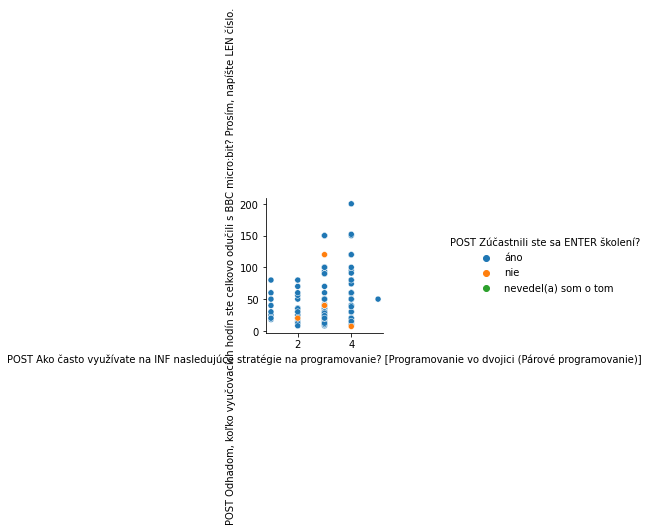

In [190]:
sea.pairplot(
    merged_data,
    x_vars=[
        'POST Ako často využívate na INF nasledujúce stratégie na programovanie? [Programovanie vo dvojici (Párové programovanie)]',
    ],
    y_vars=[
        'POST Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit? Prosím, napíšte LEN číslo.',
    ],
    hue='POST Zúčastnili ste sa ENTER školení?'
)

<AxesSubplot:ylabel='POST Zúčastnili ste sa ENTER školení?'>

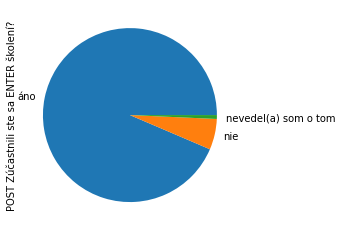

In [191]:
merged_data['POST Zúčastnili ste sa ENTER školení?'].value_counts().plot(kind='pie')

In [192]:
merged_data[[
    # 'POST Pohlavie',
    'POST Zúčastnili ste sa ENTER školení?',
    'POST Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit? Prosím, napíšte LEN číslo.',
]].groupby('POST Zúčastnili ste sa ENTER školení?')['POST Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit? Prosím, napíšte LEN číslo.'].mean()

POST Zúčastnili ste sa ENTER školení?
nevedel(a) som o tom    20.00000
nie                     33.62500
áno                     45.21374
Name: POST Odhadom, koľko vyučovacích hodín ste celkovo odučili s BBC micro:bit? Prosím, napíšte LEN číslo., dtype: float64

**Učitelia, ktorí sa zúčastnili našich kurzov v priemere odučili o polovicu viac hodín informatiky s micro:bitmi
ako tí, ktorí sa našich kurzov nezúčastnili.**

# Hypotézy
1. Existuje súvislosť medzi počtom odučených hodín s micro:bitmi a posunom vo vnímanej sebaúčinnosti (24 atribútov s hodnotami od 1 (najmnej) po 10 (najviac), sledujeme posun).
2. V menších obciach je zmena v sebaúčinnosti väčšia ako vo väčších obciach.
3. Na základe počtu odučených žiakov a veľkosti mesta vieme predikovať zmenu v sebaúčinnosti.



Nerobíme:
- Existuje súvislosť medzi počtom odučených rokov informatiky a mierou využívania práce v skupinách na hodinách INF (prácu v skupinách môžeme nahradiť aj diskusiou, projektovou prácou, atď.)
- Existuje súvislosť medzi počtom odučených hodín s micro:bitmi a vo vnímanom posune v odbornosti? 

# Porovnanie so zoznamom všetkých škôl na Slovensku
- Hypotéza: Školám s horším hodnotením INEKO častejšie zamietli projekt oproti školám s lepším hodnotením INEKO.